In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil.parser as dp
from calendar import month
import datetime

import plotly.express as px

from fredapi import Fred
from env import my_fred_key
fred = Fred(my_fred_key)

In [2]:
# Creating the data model

start_date = dp.parse('2012-01-01')
ukraine_war = dp.parse('2022-02-24')

cpi_mom = fred.get_series('CPIAUCSL')
cpi_mom = cpi_mom[cpi_mom.index > start_date]

In [3]:
cpi_mom

2012-02-01    228.329
2012-03-01    228.807
2012-04-01    229.187
2012-05-01    228.713
2012-06-01    228.524
               ...   
2022-02-01    284.182
2022-03-01    287.708
2022-04-01    288.663
2022-05-01    291.474
2022-06-01    295.328
Length: 125, dtype: float64

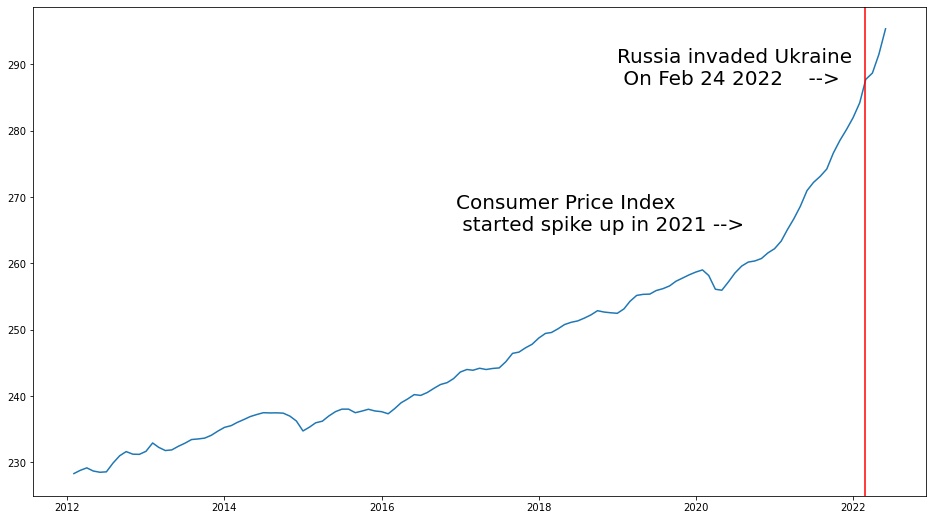

In [4]:
plt.figure(figsize=(16,9))
plt.plot(cpi_mom)

plt.axvline(ukraine_war, c = 'red')
plt.text(ukraine_war+datetime.timedelta(days = -1150), 287
         ,'Russia invaded Ukraine\n On Feb 24 2022    -->'
         , fontsize=20)

# Now plotting the CPI spike:
plt.text(ukraine_war+datetime.timedelta(days=-1900),265
         ,'Consumer Price Index \n started spike up in 2021 -->'
         ,fontsize=20)

plt.show()

In [5]:
from matplotlib.dates import date2num

In [6]:
ymark = cpi_mom[-5]
xpos = cpi_mom.index[-5]
xmark = cpi_mom[xpos]

In [7]:
print(xmark, xpos, ymark)

284.182 2022-02-01 00:00:00 284.182


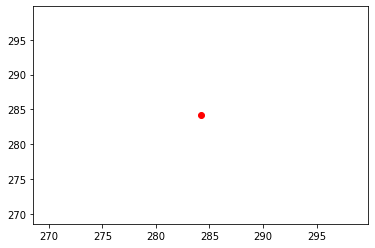

In [8]:
plt.plot(xmark, ymark, 'ro')
plt.show()

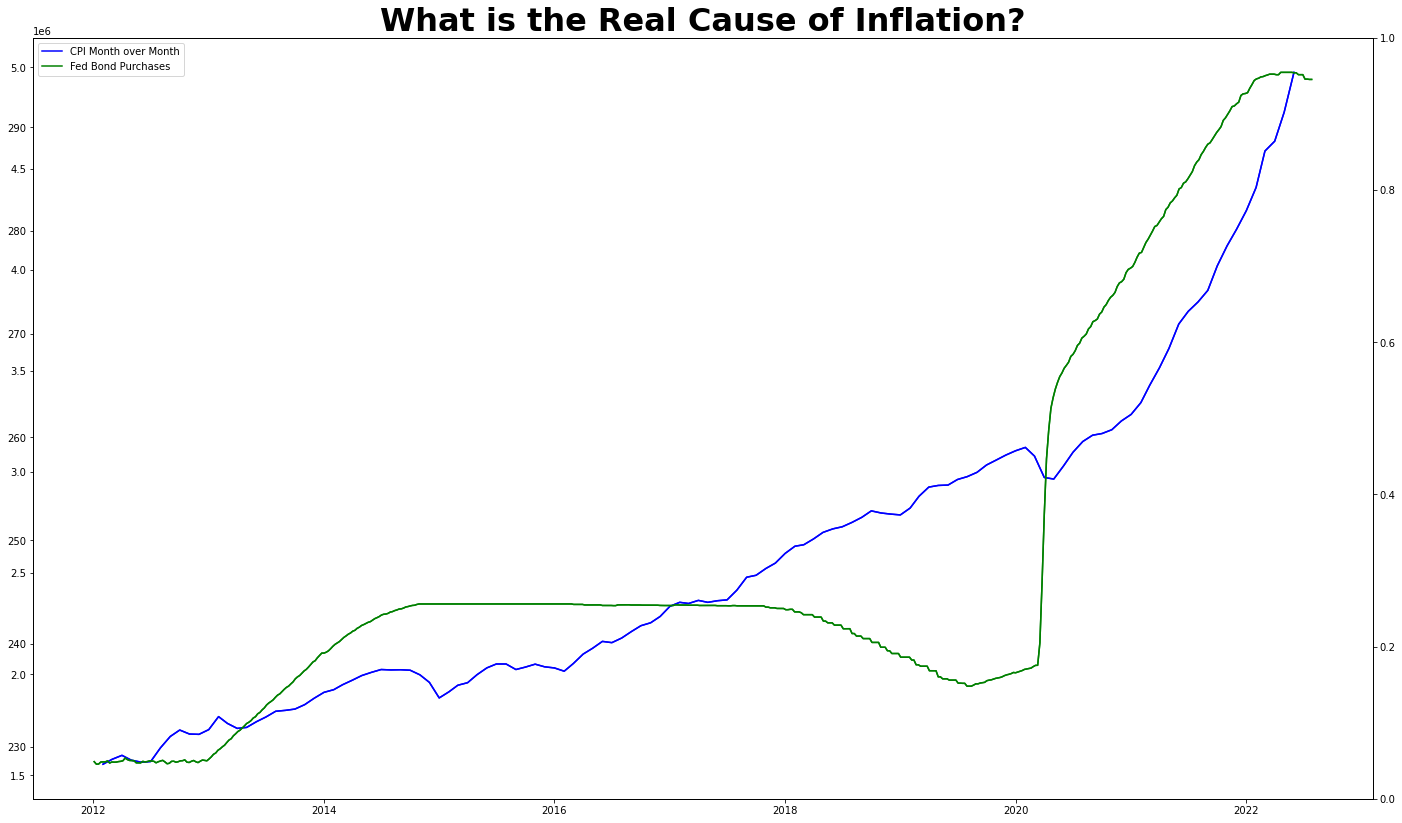

In [9]:
#Ukraine war wasn't the cause of the inflation spike. So what was?
# Let's keep looking.

start_date = dp.parse('2012-01-01')
ukraine_war = dp.parse('2022-02-24')

cpi_mom = fred.get_series('CPIAUCSL')
cpi_mom = cpi_mom[cpi_mom.index > start_date]

fed_bonds = fred.get_series('WSHONBNL')
fed_bonds = fed_bonds[fed_bonds.index > start_date]

fig, ax1 = plt.subplots(figsize = (24,14))
ax2 = ax1.twinx()
ax3 = ax2.twinx()
# ax3 = ax1.twinx()


ax1.plot(cpi_mom, c='blue', label = 'CPI Month over Month')
ax2.plot(fed_bonds, c='green', label = 'Fed Bond Purchases')
# ax3.plot(cpi_mom, c = 'red', ls = '-.')

# ax1.axvline(ukraine_war, c='darkred', ls = '--', label = 'Russia Invades Ukraine')

# ax1.axvspan(cpi_mom[-5], cpi_mom[-1], color='darkred', label = 'Russia Invades Ukraine', alpha = 0.3)

# ymark = cpi_mom[-5]
# xpos = cpi_mom.index[-5]
# xmark = cpi_mom[xpos]  
            
# ax1.text(ukraine_war+datetime.timedelta(days=-1400),287
#          ,'Russia invaded Ukraine \n On 24 Feb 2022 -->'
#          ,fontsize=20)
# ax1.text(ukraine_war+datetime.timedelta(days=-1950),230
#          ,'FED started unlimited QE\n in March 2020         -->'
#          ,fontsize=20)

# Ukraine war dot
# ukx = [240]
# uky = [-1500]
# plt.plot(ukx, uky, markersize = 5, markeredgecolor = 'black', markerfacecolor = 'mediumblue')

# plt.annotate("Ukraine War", xy = (ukraine_war, 


# Titles and legends:
lns1 = ax1.plot(cpi_mom,c='blue', label = 'CPI Month over Month')
lns2 = ax2.plot(fed_bonds,c='green', label = 'Fed Bond Purchases')
# lns3 = ax1.plot(ukraine_war,c='darkred', ls = '--', label = 'Russia Invades Ukraine')
leg = lns1 + lns2
labs = [l.get_label() for l in leg]

plt.title("What is the Real Cause of Inflation?", fontsize = 32, fontweight = 'bold')
ax1.legend(leg, labs, loc = 0)
plt.show()

# Working Chart

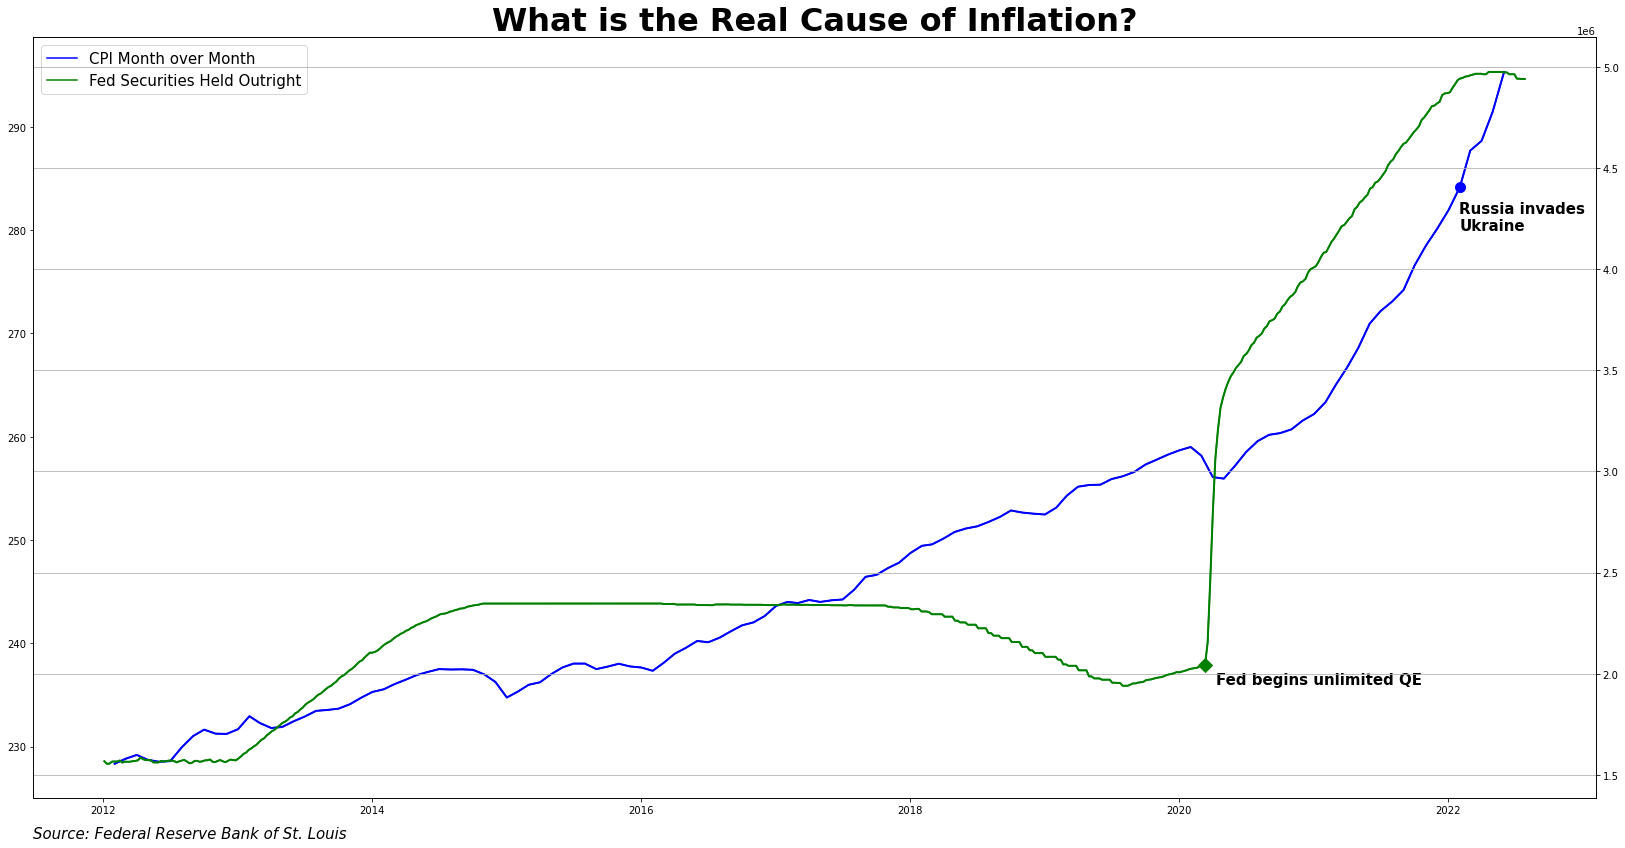

In [18]:
#Ukraine war wasn't the cause of the inflation spike. So what was?
# Let's keep looking.

start_date = dp.parse('2012-01-01')
ukraine_war = dp.parse('2022-02-24')
bond_start = dp.parse('2020-03-11')


cpi_mom = fred.get_series('CPIAUCSL')
cpi_mom = cpi_mom[cpi_mom.index > start_date]

markers_on = [120]

fed_bonds = fred.get_series('WSHONBNL')
fed_bonds = fed_bonds[fed_bonds.index > start_date]

fed_marker = [-125]

fig, ax1 = plt.subplots(figsize = (28,14))
ax2 = ax1.twinx()
# ax3 = ax1.twinx()

# highlight_dates = cpi_mom.index[[-5]]
# ax3.scatter(x = cpi_mom.index[-5], y = cpi_mom[-5], color = 'red', marker = 'd')

# Text for the Ukraine War start:
# ymark = cpi_mom[-5]
# xpos = cpi_mom.index[-5]
# xmark = cpi_mom[xpos]  
# ax3.plot(xmark, ymark, 'ro')

ax1.plot(cpi_mom, c='blue', markevery = markers_on, marker = 'o', markersize = 10, linewidth = 2, label = 'CPI Month over Month')
ax2.plot(fed_bonds, c='green', markevery = fed_marker, marker = 'D', markersize = 10, linewidth = 2, label = 'Fed Bond Purchases')
# ax3.plot(cpi_mom[-5], c = 'red', marker = 'o')

ax1.text(ukraine_war+datetime.timedelta(days = -25), 280, s = "Russia invades \nUkraine", fontsize = 15, fontweight = 'bold',  zorder = 1)
ax1.text(bond_start+datetime.timedelta(days = +30), 236, s = "Fed begins unlimited QE", fontsize = 15, fontweight = 'bold', zorder = 1)

# Titles and legends:
lns1 = ax1.plot(cpi_mom,c='blue', label = 'CPI Month over Month')
lns2 = ax2.plot(fed_bonds,c='green', label = 'Fed Securities Held Outright')
# lns3 = ax1.plot(ukraine_war,c='darkred', ls = '--', label = 'Russia Invades Ukraine')
leg = lns1 + lns2
labs = [l.get_label() for l in leg]

plt.grid(visible=True)
plt.title("What is the Real Cause of Inflation?", fontsize = 32, fontweight = 'bold')
ax1.legend(leg, labs, loc = 0, fontsize = 15)
# ax1.ticklabel_format(style = "plain") # Need to figure this out still.
# plt.tight_layout()
source_credit = 'Source: Federal Reserve Bank of St. Louis \nCPI MoM: CPIAUCSL \nFed Securities Held '
plt.figtext(.125, .0859, source_credit, fontsize = 15, fontstyle = 'italic')
plt.savefig('inflation_cause.png')
plt.savefig('inflation_cause.jpg')
plt.show()